# Expo_7: Cross validation & Evaluating metric and scoring

En la validación cruzada, los datos se dividen repetidamente y se entrenan varios modelos

In [1]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# crea un conjunto de datos sinteticos
X, y = make_blobs(random_state=0)
# dividir los datos y etiquetas en un conjunto de entrenamiento y otro de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# Crear un modelo, ajustandolo al conjunto de entrenamiento, usando Fit.
logreg = LogisticRegression().fit(X_train, y_train)
# se evalua el modelo en el conjunto de prueba usando Score(para la clasificación calcula la fracción de muestras clasificadas correctamente).
print("Test set score: {:.2f}".format(logreg.score(X_test, y_test)))

Test set score: 0.88


1. Se divide el modelo en $k=5$ partes
1. Se entrenan varios modelos de la siguiente manera.
    1. Modelo 1 -> (Fold 1 = prueba) (Folds (2-3-4-5) = entrenamiento)
    1. Modelo 2 -> (Fold 2 = prueba) (Folds (1-3-4-5) = entrenamiento)
    1. Modelo 3 -> (Fold 3 = prueba) (Folds (1-2-4-5) = entrenamiento)
    1. Modelo 4 -> (Fold 4 = prueba) (Folds (1-2-3-5) = entrenamiento)
    1. Modelo 5 -> (Fold 5 = prueba) (Folds (1-2-3-4) = entrenamiento)
1. Para cada uno de estos paso se calcula la precisión, obteniendo $5$ datos.


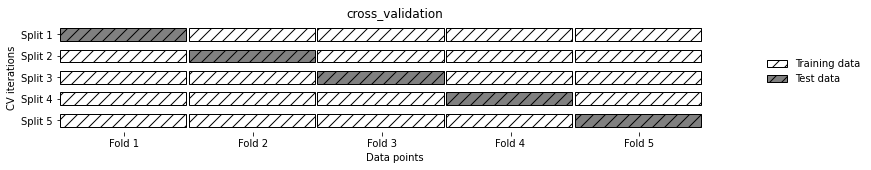

In [4]:
import matplotlib.pyplot as plt
import mglearn
mglearn.plots.plot_cross_validation()

Cross-validation está implementado en scikit-learn usando la función cross_val_score del módulo model_selection

Los parámetros de la función cross_val_score son:
1. El modelo que queremos evaluar
1. Los datos de entrenamiento
1. Las etiquetas

## Evaluemos LogisticRegression en el conjunto de datos del iris:

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
iris = load_iris()
logreg = LogisticRegression()
scores = cross_val_score(logreg, iris.data, iris.target, cv=3)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.98 0.96 0.98]


C:\Users\Camila Silva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
# Podemos cambiar el número de pliegues utilizados cambiando el parámetro cv
scores = cross_val_score(logreg, iris.data, iris.target) 
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]


C:\Users\Camila Silva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Una forma común de resumir la precisión de la validación cruzada es calcular la media:

In [10]:
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.97


La media nos muestra una precisión de al rededor del 97% y cuando observamos los cinco puntajes producidos por la validación cruzada de cinco veces, también podemos concluir que existe una variación relativamente alta en la precisión entre flods, que van desde el 100% de precisión hasta el 90% de precisión.

## Stratified k-Fold Cross-Validation

In [15]:
from sklearn.datasets import load_iris
iris = load_iris()
print("Iris labels:\n{}".format(iris.target))

Iris labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Cuando se tienen ciertos conjuntos de datos como el anterior, no es muy bueno el resultado de k-folds cross-validation, por lo que podemos usar, Stratified k-Fold Cross-Validation, ya que se dividen los datos de manera que las proporciones entre clases sean las mismas en cada pliegue que en todo el conjunto de datos.

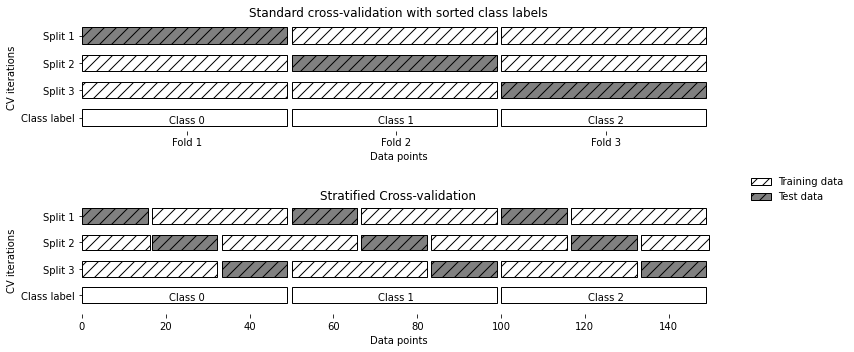

In [16]:
mglearn.plots.plot_stratified_cross_validation()

Teniendo asi un resultado parejo para todo conjunto de datos.

## 